In [1]:
# Data manipulation and math operations
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting
from sklearn.model_selection import train_test_split

# Preprocess Pipeline that works with SMOTE
from imblearn.pipeline import Pipeline

# Preprocessing and Feature Handling
from sklearn.preprocessing import RobustScaler # Median Scaler
from sklearn.preprocessing import PowerTransformer # Skew Correction

from imblearn.over_sampling import SMOTE # Oversampling for Class Imbalance

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC as SupportVectorClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model Performance Evaluation and Selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# To inform the reader how long each cell is executing (Fitting)
from time import time

# I. Data Loading

In [2]:
from sys import modules

my_env = None
path = None
# Environment Runtime Check: Hosted (Colab) or Local (Colab to Jupyter Notebook)
if 'google.colab' in modules: # Hosted runtime
  from os.path import ismount
  from google.colab import drive

  if not ismount('/content/drive'):
    drive.mount('/content/drive')

  my_env = 'Linux'

  # Path on Colab Environment
  path = '/content/drive/MyDrive/BSBI Fundamentals of ML/Practical/creditcard.csv'
  print("Google Colab Environment")

else: # Local runtime
  import psutil

  my_env = 'Windows' # Personally my local environment is windows

  # Path on Local Host environment
  path = 'C:/Users/Desktop/Desktop/creditcard.csv'
  print("Local Host Environment")

# Loading the dataset
df_raw = pd.read_csv(path)
print("Dataset path:", path)

Local Host Environment
Dataset path: C:/Users/Desktop/Desktop/creditcard.csv


# II. Data Exploration

## A. Data Preview

In [3]:
# Preview of the dataset
print('Previewing the first five entries (0-4) of the dataset')
print(df_raw.head().T)

Previewing the first five entries (0-4) of the dataset
                 0         1           2           3          4
Time      0.000000  0.000000    1.000000    1.000000   2.000000
V1       -1.359807  1.191857   -1.358354   -0.966272  -1.158233
V2       -0.072781  0.266151   -1.340163   -0.185226   0.877737
V3        2.536347  0.166480    1.773209    1.792993   1.548718
V4        1.378155  0.448154    0.379780   -0.863291   0.403034
V5       -0.338321  0.060018   -0.503198   -0.010309  -0.407193
V6        0.462388 -0.082361    1.800499    1.247203   0.095921
V7        0.239599 -0.078803    0.791461    0.237609   0.592941
V8        0.098698  0.085102    0.247676    0.377436  -0.270533
V9        0.363787 -0.255425   -1.514654   -1.387024   0.817739
V10       0.090794 -0.166974    0.207643   -0.054952   0.753074
V11      -0.551600  1.612727    0.624501   -0.226487  -0.822843
V12      -0.617801  1.065235    0.066084    0.178228   0.538196
V13      -0.991390  0.489095    0.717293    0.507

In [4]:
display(df_raw.describe()[1:].T)

,mean,std,min,25%,50%,75%,max
Time,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
print(f"Dimensions: {df_raw.shape[1]} columns by {df_raw.shape[0]} rows")
print("Null Values:", df_raw.isnull().sum().sum())
print("NA Values:", df_raw.isna().sum().sum())
print("Duplicated Entries:", df_raw.duplicated().sum())

Dimensions: 31 columns by 284807 rows
Null Values: 0
NA Values: 0
Duplicated Entries: 1081


In [6]:
# View Integrity of the data, check for missing values, inconsistent entries etc.
print(pd.DataFrame({
  'null or na': df_raw.isnull().sum() + df_raw.isna().sum(),
  'dtype': df_raw.dtypes,
  'one_dtype': df_raw.apply(type).nunique() == 1
}))

        null or na    dtype  one_dtype
Time             0  float64       True
V1               0  float64       True
V2               0  float64       True
V3               0  float64       True
V4               0  float64       True
V5               0  float64       True
V6               0  float64       True
V7               0  float64       True
V8               0  float64       True
V9               0  float64       True
V10              0  float64       True
V11              0  float64       True
V12              0  float64       True
V13              0  float64       True
V14              0  float64       True
V15              0  float64       True
V16              0  float64       True
V17              0  float64       True
V18              0  float64       True
V19              0  float64       True
V20              0  float64       True
V21              0  float64       True
V22              0  float64       True
V23              0  float64       True
V24              0  float

## B. Data Cleaning

In [7]:
df_cleaning = df_raw.copy()

In [8]:
# No Irrelevant Columns

In [9]:
df_cleaning.drop_duplicates(inplace=True)

In [10]:
# Data Types are consistent

In [11]:
# There are no missing data in all entries

In [12]:
categorical_features = []
numerical_features = df_cleaning.columns.drop(['Class']).to_list()
target_features = df_cleaning.columns.drop(numerical_features).to_list()

print(f"Categorical Features: {categorical_features}")
print(f"Numerical Features: {numerical_features}")
print(f"Target Features: {target_features}")

Categorical Features: []
Numerical Features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Target Features: ['Class']


In [13]:
# No need for encoding

## C. Data Analysis

### Target Feature Distribution
There is a tremendous class imbalance on the dataset.<br>
Within **283'926 entries** (after removing the duplicates) 99.83% are anotated as `not-fraud` (0), while 0.17% as `fraud` (1).

In [14]:
def plot_count_distribution(df, categorical_features, target_features, ncols = 1):
  # Assuming the amount of features are at most 100
  ncols = ncols
  nrows = (len(categorical_features) + ncols-1) // ncols

  # Create a figure per target feature
  for i, target in enumerate(target_features):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2*ncols, 4*nrows))
    axes = np.array(axes).flatten()

    fig.suptitle(f'{i+1}. Distribution of Categorical Features on `{target}`')

    # Subplot each feature into the figure.
    for j, feature in enumerate(categorical_features):
      sns.countplot(data=df, x=feature, hue=df[target], ax=axes[j])
      axes[j].set(xlabel='', ylabel='', title=f'{j+1}: {feature} vs {target}')

    fig.tight_layout()

    fig.show()

  return

C:\Users\Desktop\AppData\Local\Temp\ipykernel_3208\2583816240.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


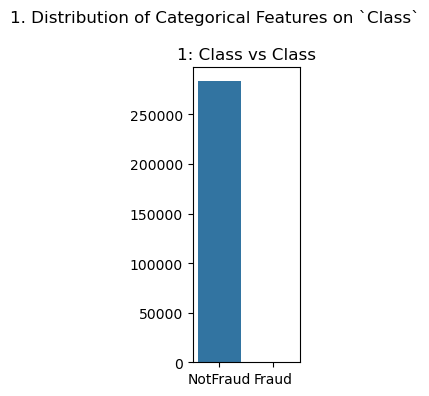

In [15]:
df_plot = df_cleaning.copy()
df_plot['Class'] = df_plot['Class'].map({0: 'NotFraud', 1: 'Fraud'})
plot_count_distribution(df_plot, target_features, target_features)

In [16]:
print(pd.DataFrame({
    'Count': df_plot['Class'].value_counts(),
    'Percentage': (df_plot['Class'].value_counts()/len(df_plot) * 100).round(2).astype(str) + ' %'
}).T)

Class      NotFraud   Fraud
Count        283253     473
Percentage  99.83 %  0.17 %


### Categorical Feature

In [17]:
# No Categorical Feature

### Numerical Feature

In [18]:
def plot_hist_distribution(df, numerical_features, target_features, ncols=4):
  # Assuming the amount of features are at most 100
  ncols = ncols
  nrows = (len(numerical_features) + ncols-1) // ncols

  # Create a figure per target feature
  for i, target in enumerate(target_features):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 3.5*nrows))
    axes = np.array(axes).flatten()

    fig.suptitle(f'{i+1}. Distribution of Numerical Features on `{target}`')

    # Subplot each feature into the figure.
    for j, feature in enumerate(numerical_features):
      # Histogram Plot
      ax = axes[j]
      # set bin to 20 to reduce plotting time from 6.5 minutes to a few seconds
      sns.histplot(data=df, x=feature, hue=df[target], bins=20, ax=ax)
      ax.set(ylabel='', title=f'{j+1}: {feature} (γ={df[feature].skew():.2f})')
      ax.grid(axis='y', alpha=0.2)

      # Embed a Box Plot for visualizing outliers and the class means per feature
      boxplot_ax = ax.inset_axes([0, -0.15, 1, 0.15])
      sns.boxplot(data=df, x=feature, hue=df[target], legend=False, orient='h', ax=boxplot_ax)
      boxplot_ax.set(yticks=[], ylabel='', xlabel='')

    fig.tight_layout()
    fig.subplots_adjust(top=0.96)

    fig.show()

  return

**Numerical Feature Distribution**<br>
No orange-shaded plots representing `fraud` entries are found due to the population of the class being miniscule.<br>
~400 Fraud class over 283'926

C:\Users\Desktop\AppData\Local\Temp\ipykernel_3208\4119623181.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


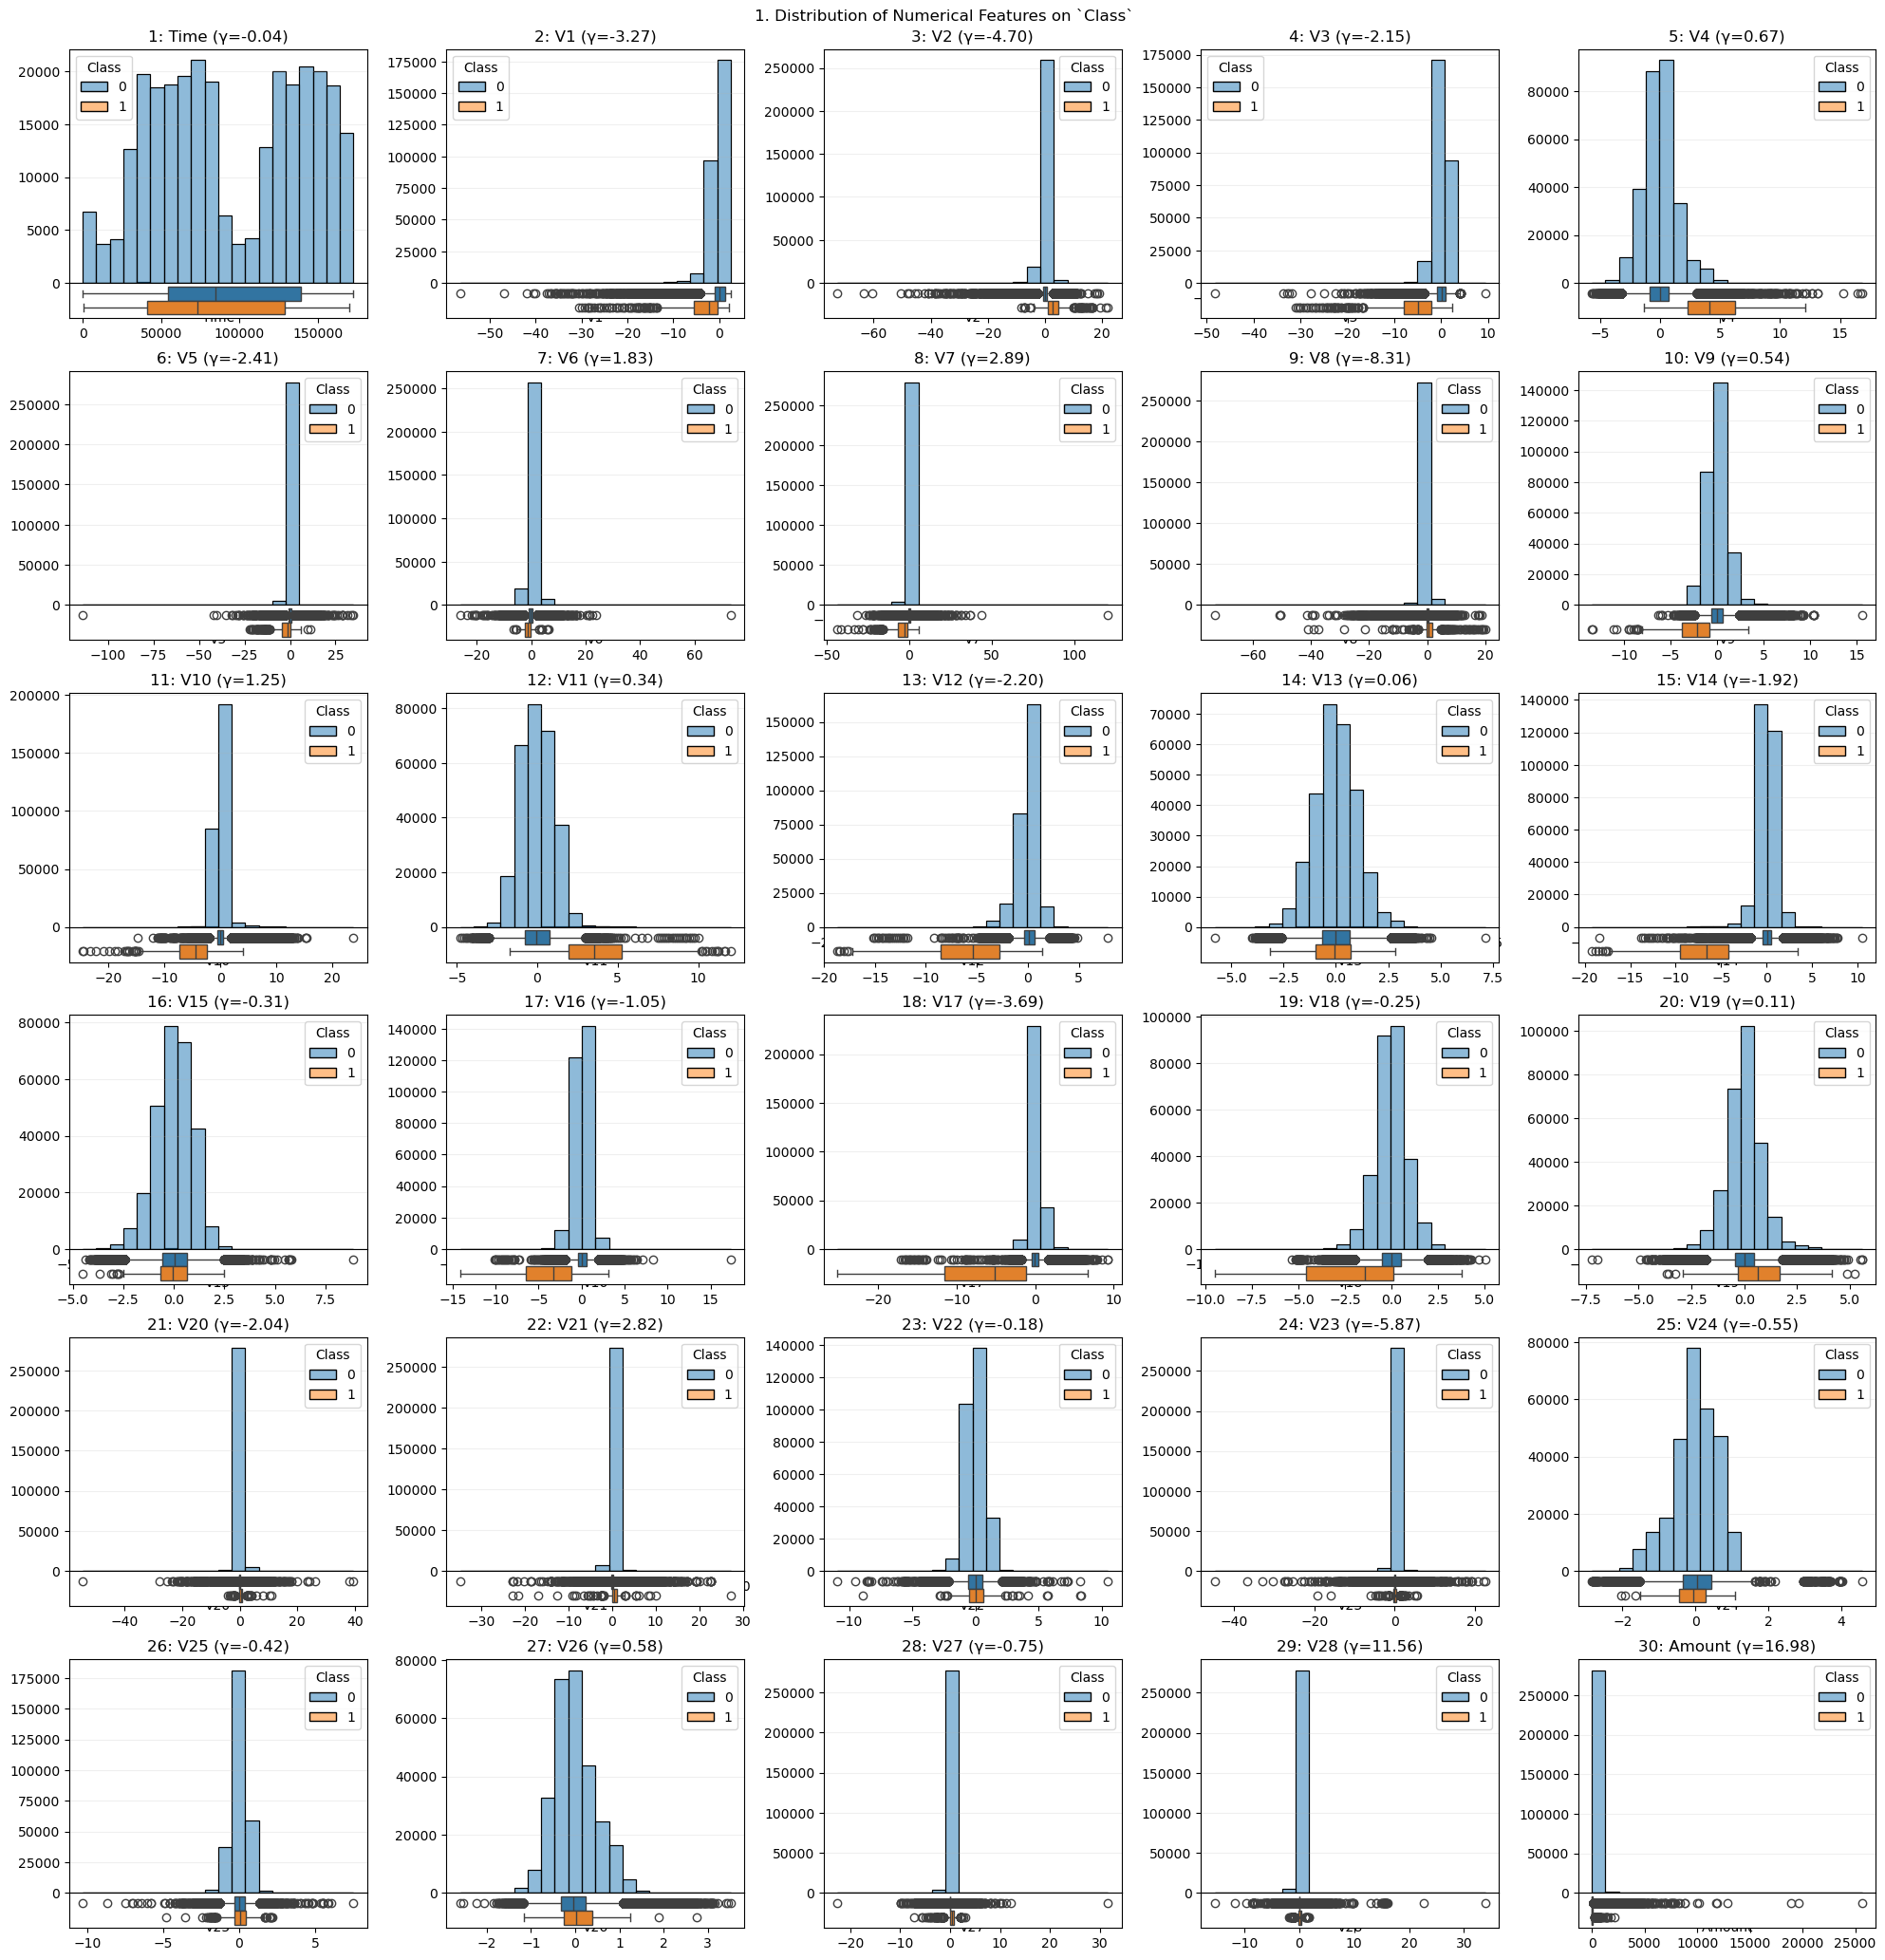

In [19]:
plot_hist_distribution(df_cleaning, numerical_features, target_features, 5)

**Numerical Feature Correlation**<br>
As shown from histogram above, the features where the classes (blue and orange) that have greater mean separation illustrated by the box plot tend to have greater correlation as shown on the bar plot below.

The dimensionality of the data has been addressed using PCA according to the source of the data set.

In [20]:
correlation_matrix = df_cleaning[numerical_features + target_features].corr()

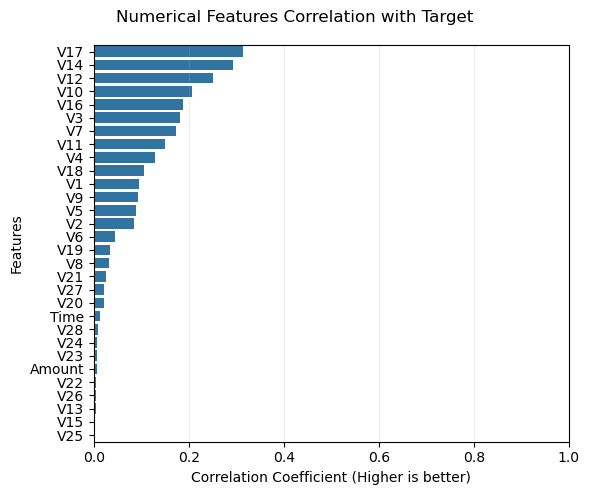

In [21]:
plt.figure(figsize=(6, 5))
sns.barplot(data=correlation_matrix[target_features[0]][:-1].abs().sort_values(ascending=False), orient='h')
plt.suptitle('Numerical Features Correlation with Target')
plt.xlabel('Correlation Coefficient (Higher is better)')
plt.ylabel('Features')
plt.xlim(0, 1)
plt.grid(axis='x', alpha=0.2)

plt.tight_layout()
plt.show()

In [22]:
def cm_plot(cm, width, height):
  plt.figure(figsize=(width, height))

  sns.heatmap(data=cm, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2f')
  plt.yticks(rotation=0, ha='right')
  plt.xticks(rotation=45, ha='right')

  plt.tight_layout()
  plt.show()

  return

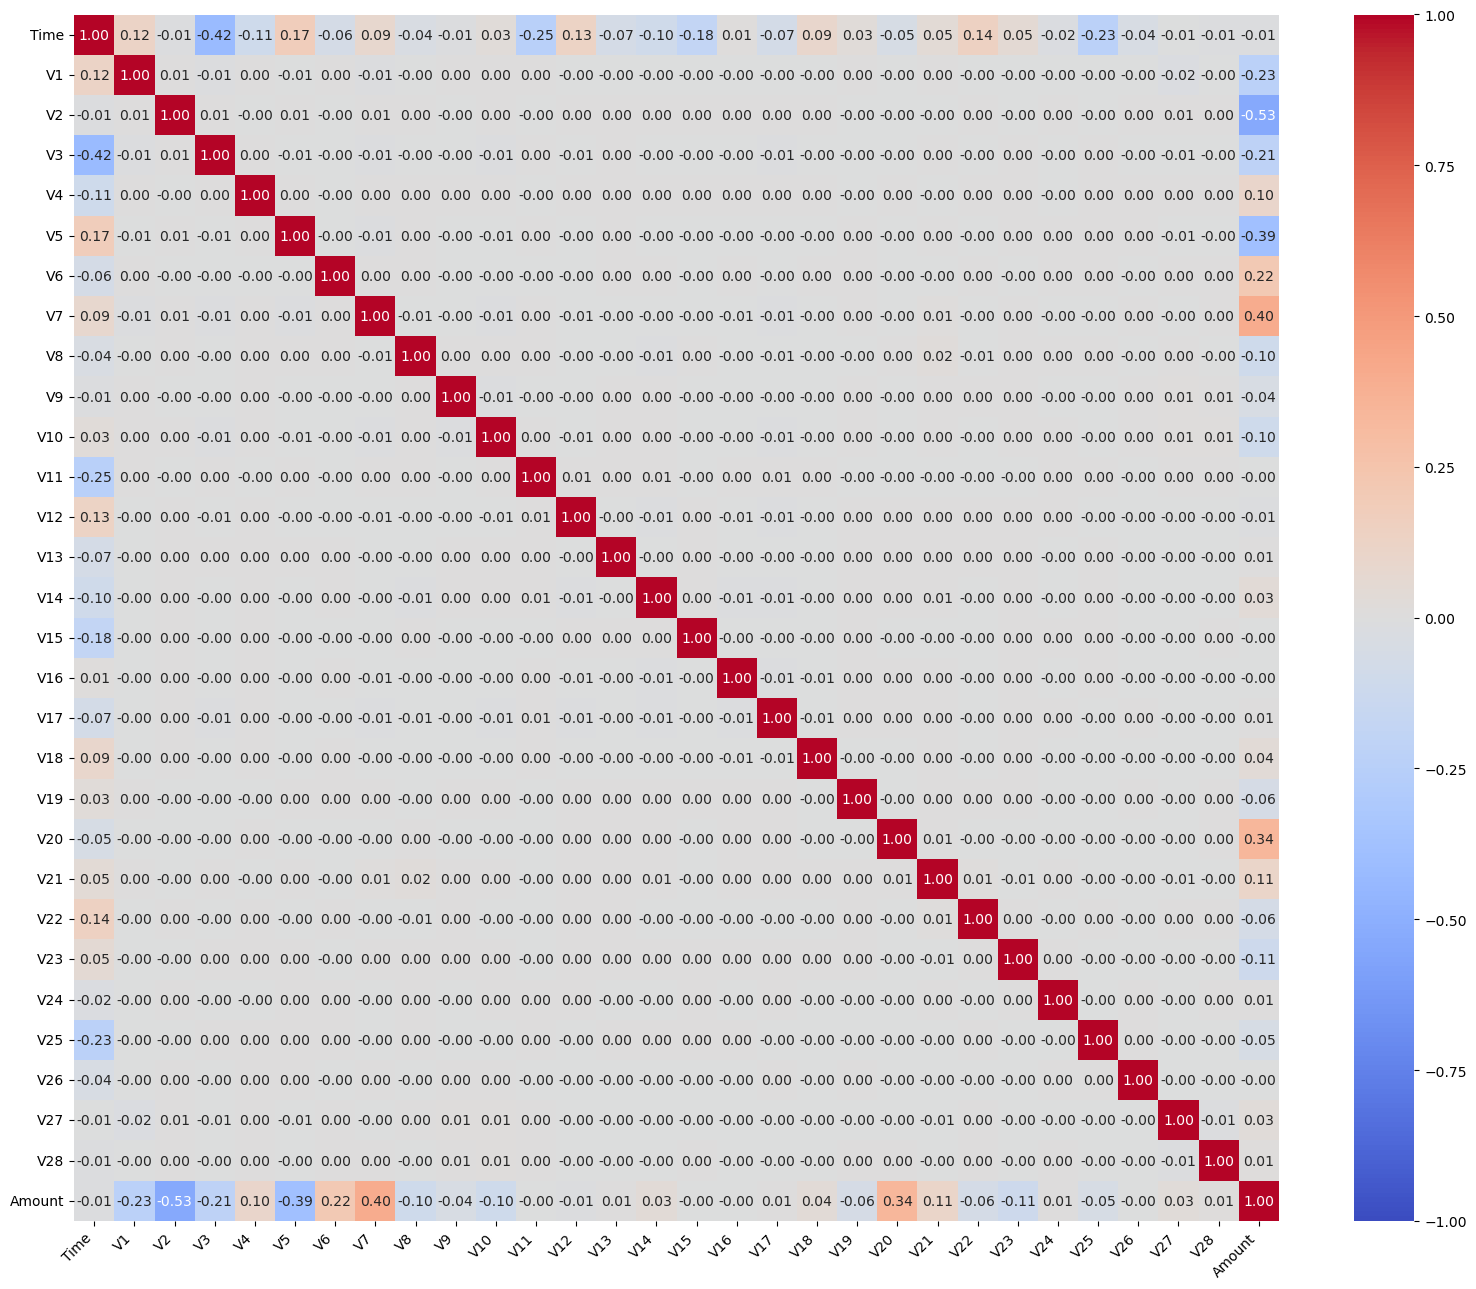

In [23]:
# Plotting correlation between numerical features, and numerical features and target features
cm_plot(correlation_matrix.iloc[:-1, :-1], 16, 13)

# III. Splitting and Preprocessing

In [24]:
df_prep = df_cleaning.copy()
seed = 42

## A. Hold Out Split (For all Models)
1. Logistic Regression
2. Naive Bayes (Gaussian)
3. Support Vector Machines (RBF)
4. k-Nearest Neighbors
5. Decision Tree
6. Random Forest
7. AdaBoost
8. Gradient Boost

Due to class imbalance, the split will be stratified to preserve the proportion of the class per split. The data will be shuffled to reduce dataset index positional bias.<br></br>
The 80% of the dataset will be used for the training. They will be subjected into an internal cross validation for checking the average performance (Metrics Average) and performance stability (Metrics Standard Deviation) of the algorithms.<br></br>
The 20% of the dataset will be used for the final validation. The internal CV in the training subset will check for the algorithms' performance and stability. The final validation subset will act as a double check for the algorithms' robustness against overfitting, making sure that the algorithms would still have the same performance with unseen data (represented by final validation subset) vs training data.

In [25]:
X = df_prep.drop(columns=target_features)
y = df_prep[target_features]

# Data Splitting 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, shuffle=True, random_state=seed
)

y_train = pd.Series(y_train.values.ravel(), name=target_features[0])
y_test  = pd.Series(y_test.values.ravel(),  name=target_features[0])

print(y_train.name, "Train Shape:", y_train.shape)
print(y_test.name,  "Test Shape:",  y_test.shape)

Class Train Shape: (226980,)
Class Test Shape: (56746,)


## B. Non-Tree Model Preprocessing
Algorithms like:
1. Logistic Regression
2. Naive Bayes Gaussian
3. Support Vector Machines (RBF)
4. k-Nearest Neighbors

all benefit from data that assume a Gaussian distribution.<br>
**Winsorization** will reduce the influence of <u>extreme outliers</u>.<br>
**Yeo-Johnson Transformer** will reduce the <u>magnitude of skewness</u> in the dataset.<br>
A **Robust Scaler** (Median-Zero, Unit-IQR) will mitigate the <u>remaining outliers</u>, while maintaining a <u>quasigaussian distribution</u> for compatibility with the algorithms.

### 1. Winsorization
Remove extreme outliers while avoiding accidentally distorting the information of the minority class (Fraud)

In [26]:
# Define the upper and lower limit quantiles (Qs)
Qs = X_train.quantile(q=[0.01, 0.99], interpolation='midpoint')

# Winsorize
X_train_winsor = X_train.clip(lower=Qs.loc[0.01], upper=Qs.loc[0.99], axis=1)
X_test_winsor  = X_test.clip(lower=Qs.loc[0.01],  upper=Qs.loc[0.99], axis=1)

### 2. Yeo-Johnson Skewness Transformation
YJ Transformation is only applied to features with skewness magnitude above 1

In [27]:
# Select Features with high skewness
skewed_features = X_train_winsor.loc[:, X_train_winsor.skew().abs() > 1].columns.to_list()

print("There are", len(skewed_features), "skewed features (γ>1).")
print(skewed_features)

There are 7 skewed features (γ>1).
['V1', 'V6', 'V8', 'V12', 'V20', 'V28', 'Amount']


In [28]:
X_train_YJ = X_train_winsor.copy()
X_test_YJ  = X_test_winsor.copy()

# Declare the Power Transformer
YJ_Transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# Perform YJ Transformation
X_train_YJ[skewed_features] = YJ_Transformer.fit_transform(X_train_YJ[skewed_features])
X_test_YJ[skewed_features]  = YJ_Transformer.transform(X_test_YJ[skewed_features])

### 3. Robust Scaler
For residual outliers and weaker skewness, a Robust Scaler will transform the data to assume a Median-Centered and IQR-Unit distribution. To achieve Quasinormal distribution, `unit_variance` is set to `True` to rescale the IQR so that IQR-based Standard Deviation = 1.

In [29]:
X_train_rs = X_train_YJ.copy()
X_test_rs  = X_test_YJ.copy()

# Declare the Robust Scaler
rs_scaler = RobustScaler(unit_variance=True)

# Perform the Robust Scaler
X_train_rs = pd.DataFrame(
    rs_scaler.fit_transform(X_train_rs),
    columns=X_train_rs.columns,
    index=X_train_rs.index
)
X_test_rs = pd.DataFrame(
    rs_scaler.transform(X_test_rs),
    columns=X_test_rs.columns,
    index=X_test_rs.index
)

# IV. Model Training (General Performance w/ Cross Validation)

## A. Defining the Input Data for each Algorithm

In [30]:
input_train_data = {
    'Logistic Regression':      X_train_rs,
    'Naive Bayes Gaussian':     X_train_rs,
    'Support Vector Machines':  X_train_rs,
    'k-Nearest Neighbors':      X_train_rs,
    'Decision Tree':            X_train,
    'Random Forest':            X_train,
    'AdaBoost':                 X_train,
    'Gradient Boost':           X_train
}

input_test_data = {
    'Logistic Regression':      X_test_rs,
    'Naive Bayes Gaussian':     X_test_rs,
    'Support Vector Machines':  X_test_rs,
    'k-Nearest Neighbors':      X_test_rs,
    'Decision Tree':            X_test,
    'Random Forest':            X_test,
    'AdaBoost':                 X_test,
    'Gradient Boost':           X_test
}

## B. Model Declaration
To be used in Model Training and Model Evaluation
Note: Applying SMOTE (Last Preprocessing Step) for each CV fold.

In [31]:
model_pipelines = {
    'Logistic Regression': Pipeline([
        ('smote', SMOTE(random_state=seed)),
        ('cls',   LogisticRegression(
              class_weight = 'balanced',
              random_state = seed
        ))
    ]),

    'Naive Bayes Gaussian': Pipeline([
        ('smote', SMOTE(random_state=seed)),
        ('cls',   GaussianNB())
    ]),

    'Support Vector Machines': Pipeline([
        ('smote', SMOTE(random_state=seed)),
        ('cls',   SupportVectorClassifier(
              kernel       = 'rbf',
              class_weight = 'balanced',
              random_state = seed
        ))
    ]),

    'k-Nearest Neighbors': Pipeline([
        ('smote', SMOTE(random_state=seed)),
        ('cls',   KNeighborsClassifier(
              n_neighbors  = 5,
              weights      = 'distance'
        ))
    ]),

    'Decision Tree': Pipeline([
        ('smote', SMOTE(random_state=seed)),
        ('cls',   DecisionTreeClassifier(
              class_weight = 'balanced',
              random_state = seed
        ))
    ]),

    'Random Forest': Pipeline([
        ('smote', SMOTE(random_state=seed)),
        ('cls',   RandomForestClassifier(
              class_weight = 'balanced',
              random_state = seed
        ))
    ]),

    'AdaBoost': Pipeline([
        ('smote', SMOTE(random_state=seed)),
        ('cls',   AdaBoostClassifier(
              algorithm    = 'SAMME',
              random_state = seed
        ))
    ]),

    'Gradient Boost': Pipeline([
        ('smote', SMOTE(random_state=seed)),
        ('cls',   GradientBoostingClassifier(
              random_state = seed
        ))
    ])
}

## C. Tuned Model Stratified K-Fold Cross Validation
This part is performing cross validation to estimate the anticipated generalized performance of the models.

### 1. Defining CV method for Quasiclassification Report after Fine Tuning

In [32]:
cv_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cv_scoring = ['f1', 'recall', 'precision', 'accuracy']

### 2. Perform Model Fitting for all Algorithms
## **WARNING**: THIS TAKES A WHILE TO EXECUTE
Even w/ my set up Intel 13900KF 64GB-5200MHz RAM<br>

In [33]:
def elapsed_time(s = 0):
  dy =   s // (24 * 3600)
  hr = ( s %  (24 * 3600)) // 3600
  mn = ((s %  (24 * 3600))  % 3600) // 60
  sc = ((s %  (24 * 3600))  % 3600)  % 60

  print(f"Elapsed Time: {dy:.0f} d, {hr:.0f} hr, {mn:.0f} min, and {sc:.2f} sec.")

In [34]:
cv_scores = {}

sess_time = time()
for model_name, pipeline in model_pipelines.items():

  start_time = time()
  print(f"{model_name}{(24-len(model_name))*" "}-> ", end='')

  # Performs Model Training (Fitting) and Classification Report per K-Fold
  cv_scores[model_name] = cross_validate(
      estimator = pipeline,
      X         = input_train_data[model_name],
      y         = y_train,
      cv        = cv_skf,
      scoring   = cv_scoring,
      n_jobs    = -1,
      verbose   = 0
  )

  elapsed_time(time() - start_time)
elapsed_time(time() - sess_time)

if my_env == 'Linux':
  print("CPU:")
  !lscpu

  print("RAM:")
  !free -h

else: # Assuming Windows
  print("CPU:")
  print(f"Physical cores:  {psutil.cpu_count(logical=False)}")
  print(f"Total cores:     {psutil.cpu_count(logical=True)}")
  print(f"CPU utilization: {psutil.cpu_percent()}%")

  print("\nRAM:")
  mem = psutil.virtual_memory()
  print(f"Total:           {mem.total / (1024**3):.2f} GB")
  print(f"Available:       {mem.available / (1024**3):.2f} GB")
  print(f"Used:            {mem.used / (1024**3):.2f} GB")
  print(f"Percentage used: {mem.percent}%")

Logistic Regression     -> Elapsed Time: 0 d, 0 hr, 0 min, and 2.59 sec.
Naive Bayes Gaussian    -> Elapsed Time: 0 d, 0 hr, 0 min, and 1.66 sec.
Support Vector Machines -> Elapsed Time: 0 d, 0 hr, 6 min, and 1.93 sec.
k-Nearest Neighbors     -> Elapsed Time: 0 d, 0 hr, 0 min, and 41.44 sec.
Decision Tree           -> Elapsed Time: 0 d, 0 hr, 0 min, and 26.52 sec.
Random Forest           -> Elapsed Time: 0 d, 0 hr, 3 min, and 5.06 sec.
AdaBoost                -> Elapsed Time: 0 d, 0 hr, 1 min, and 14.57 sec.
Gradient Boost          -> Elapsed Time: 0 d, 0 hr, 6 min, and 9.41 sec.
Elapsed Time: 0 d, 0 hr, 17 min, and 43.18 sec.
CPU:
Physical cores:  24
Total cores:     32
CPU utilization: 5.4%

RAM:
Total:           63.83 GB
Available:       52.99 GB
Used:            10.85 GB
Percentage used: 17.0%


## D. Analyzing the General Performance of the Models

### 1. Extracting the Mean and the STD of the Metric
The mean denotes the typical performance of the model.<br>
The standard deviation denotes the consistency of the model.<br></br>
If the standard deviation is great, the model <u>tends</u> to perform greater or lower than average.<br>
If the standard deviation is small, the model <u>tends</u> to perform closer to the average performance.

In [35]:
df_cv_scores = pd.DataFrame(cv_scores).drop(['fit_time', 'score_time'], axis=0)

cv_classification_report = pd.DataFrame({
    model_name: { # Models (LR, NB, SVM (RBF), ...)
        metric: ( # Mean and STD of each metrics in a model (Accuracy, Precision, ...)
            df_cv_scores.loc[metric, model_name].mean(),
            df_cv_scores.loc[metric, model_name].std()
         ) for metric in df_cv_scores.index
    } for model_name in df_cv_scores.columns
}).T

### 2. Observation of the metrics
Accuracy is diluted by the dominant Not Fraud class (Negatives), therefore it is meaningless against measuring Fraud detection. Metrics like Recall (Fraud Detected Rate) and Precision (Fraud Correctly-Detected Rate) better represent the performance on the minority class.
<br></br>

Most classifiers (at base hyperparameters) have great detection rate of Fraud (Good Recall), but suffers from incorrectly detecting Fraud (Bad Precision).<br></br>

Random Forest remains the most consistent algorithm. This algorithm is able to detect frauds (Good Recall) without doing too much false flagging (Good Precision). The model has an f1-score of 85%.
<br></br>

Logistic Regression is the best at detecting frauds (Good Recall) at the catch of doing too much false flagging (Bad Precision). The model only achieved ~9.5% f1-score.
<br></br>

AdaBoost & Gradient Boost has similar trend as Logistic Regression but the algorithm has Recall ~11-12% worse, and has Recall ~9-18% better. They only have an f1-score of ~24% and ~36.5% respectively.
<br></br>

k-Nearest Neighbor & Decision Tree are below-average performers with an f1-score of ~56%. Suppor Vector Machine (RBF) follows suit at ~38%. Naive Bayes (Gaussian) performed as the baseline at ~24%.

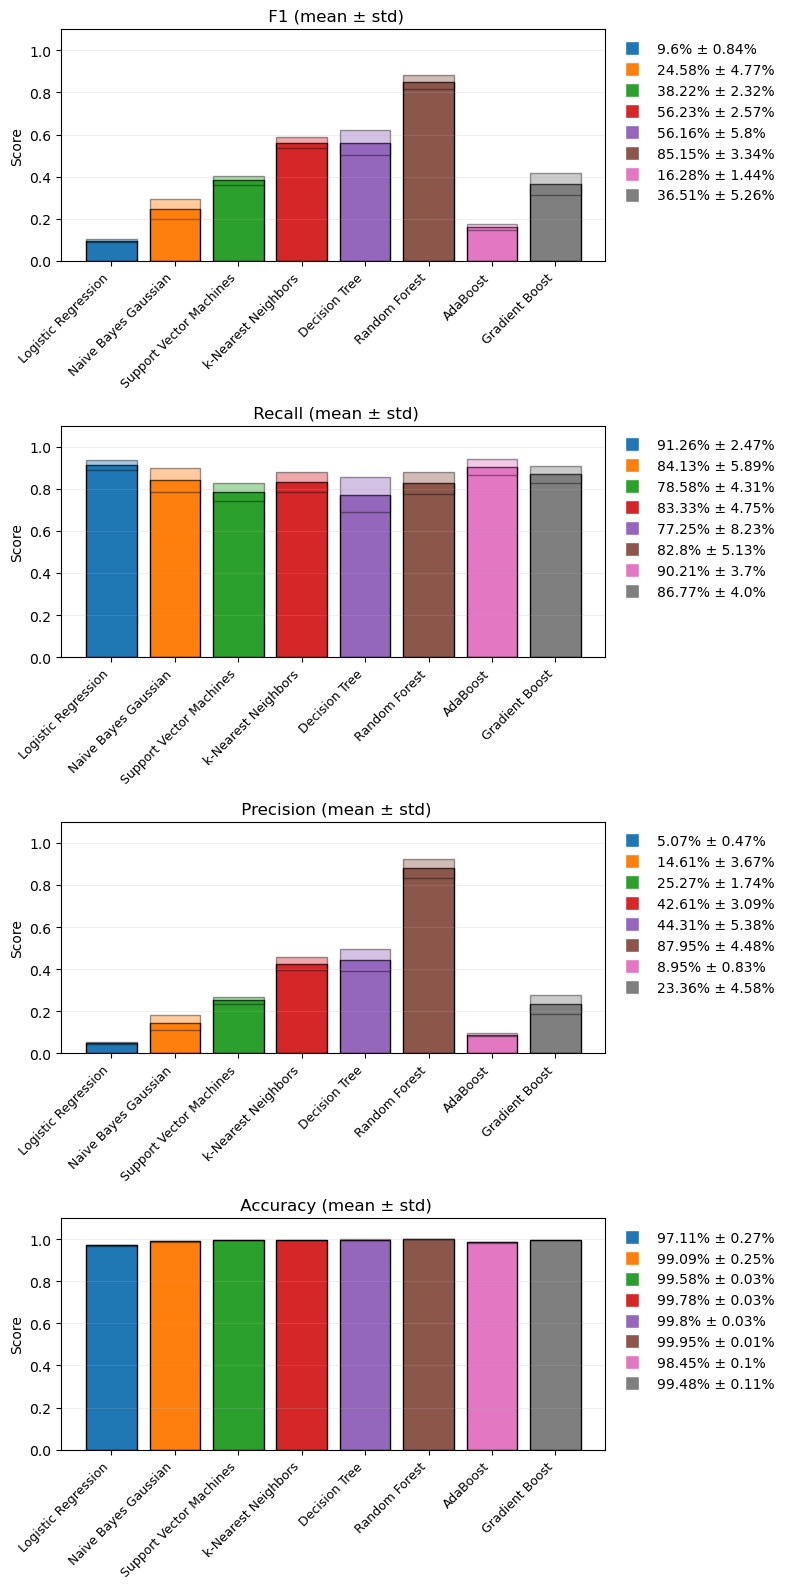

In [36]:
df_plot = cv_classification_report

# Set unique colors per model
color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
model_colors = {
    model: color_cycle[i % len(color_cycle)] for i, model in enumerate(df_plot.index)
}


# Create the figure and subplots for each metric
fig, axes = plt.subplots(nrows=len(df_plot.columns), ncols=1, figsize=(8, 4*len(df_plot.columns)))
axes = np.array(axes).flatten()

# Iterate through each metric
for i, metric in enumerate(df_plot.columns):
  ax = axes[i]

  # Unpack mean and std from each tuple cell
  means = df_plot[metric].apply(lambda t: t[0])
  stds  = df_plot[metric].apply(lambda t: t[1])

  # Bar chart: mean + stacked std (transparent)
  for j, model_name in enumerate(df_plot.index):
    ax.bar(j,  means[model_name], color=model_colors[model_name], edgecolor='black')
    ax.bar(j, 2*stds[model_name], color=model_colors[model_name], edgecolor='black',
            bottom=means[model_name]-stds[model_name], alpha=0.4)

  # Axis labeling
  ax.set_title(f"{metric.replace('_', ' ')[4:].title()} (mean ± std)", fontsize=12)
  ax.set_ylabel("Score")
  ax.set_ylim(0, 1.1)
  ax.set_xticks(list(range(len(df_plot.index))))
  ax.set_xticklabels(df_plot.index, rotation=45, ha='right', fontsize=9)

  ax.grid(axis='y', alpha=0.2)

  # Custom legend
  handles = [plt.Line2D(
      [0], [0], marker='s', color='w',
      markerfacecolor=model_colors[m],
      label=f"{(means[m]*100).round(2)}% ± {(stds[m]*100).round(2)}%",
      markersize=10
    ) for m in df_plot.index]
  ax.legend(handles=handles, bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

# V. Model Training Hold-Out Evaluation (w/ Testing Subset)
Again, the models were trained using 4/5 of the training subset and using 1/5 of the subset to validate. The final evaluation will fit 5/5 of the training subset into the models and then evaluate using the unused testing subset.

In [37]:
# Expected performance metrics based on cross validation
cv_means = cv_classification_report.map(lambda x: x[0])
cv_stds  = cv_classification_report.map(lambda x: x[1])

print("Metric Means")
display(cv_means.round(4)*100)

print("Metric Standard Deviations")
display(cv_stds.round(4)*100)

Metric Means


,test_f1,test_recall,test_precision,test_accuracy
Logistic Regression,9.60,91.26,5.07,97.11
Naive Bayes Gaussian,24.58,84.13,14.61,99.09
Support Vector Machines,38.22,78.58,25.27,99.58
k-Nearest Neighbors,56.23,83.33,42.61,99.78
Decision Tree,56.16,77.25,44.31,99.80
Random Forest,85.15,82.80,87.95,99.95
AdaBoost,16.28,90.21,8.95,98.45
Gradient Boost,36.51,86.77,23.36,99.48


Metric Standard Deviations


,test_f1,test_recall,test_precision,test_accuracy
Logistic Regression,0.84,2.47,0.47,0.27
Naive Bayes Gaussian,4.77,5.89,3.67,0.25
Support Vector Machines,2.32,4.31,1.74,0.03
k-Nearest Neighbors,2.57,4.75,3.09,0.03
Decision Tree,5.80,8.23,5.38,0.03
Random Forest,3.34,5.13,4.48,0.01
AdaBoost,1.44,3.70,0.83,0.10
Gradient Boost,5.26,4.00,4.58,0.11


## A. Fitting each model w/ all of Training Subset
## **WARNING**: THIS TAKES A WHILE TO EXECUTE
Even w/ my set up Intel 13900KF 64GB-5200MHz RAM<br>

In [38]:
holdout_classification_report = {}

sess_time = time()
for model_name, pipeline in model_pipelines.items():
  start_time = time()
  print(f"{model_name}{(24-len(model_name))*' '}-> ", end='')

  # Train the Models, still w/ SMOTE
  pipeline.fit(input_train_data[model_name], y_train)

  # Prediction Threshold is at 0.5
  y_pred = pipeline.predict(input_test_data[model_name])

  holdout_classification_report[model_name] = {
      'test_f1':        f1_score(       y_test, y_pred, zero_division=0),
      'test_recall':    recall_score(   y_test, y_pred, zero_division=0),
      'test_precision': precision_score(y_test, y_pred, zero_division=0),
      'test_accuracy':  accuracy_score( y_test, y_pred)
  }

  elapsed_time(time() - start_time)
elapsed_time(time() - sess_time)

Logistic Regression     -> Elapsed Time: 0 d, 0 hr, 0 min, and 0.92 sec.
Naive Bayes Gaussian    -> Elapsed Time: 0 d, 0 hr, 0 min, and 0.39 sec.
Support Vector Machines -> Elapsed Time: 0 d, 0 hr, 5 min, and 38.92 sec.
k-Nearest Neighbors     -> Elapsed Time: 0 d, 0 hr, 0 min, and 5.19 sec.
Decision Tree           -> Elapsed Time: 0 d, 0 hr, 0 min, and 28.70 sec.
Random Forest           -> Elapsed Time: 0 d, 0 hr, 3 min, and 48.18 sec.
AdaBoost                -> Elapsed Time: 0 d, 0 hr, 1 min, and 23.68 sec.
Gradient Boost          -> Elapsed Time: 0 d, 0 hr, 7 min, and 14.73 sec.
Elapsed Time: 0 d, 0 hr, 18 min, and 40.72 sec.


## B. Analyzing Performance of each Model on Unseen Data

In [39]:
df_plot = pd.DataFrame(holdout_classification_report).T

C:\Users\Desktop\AppData\Local\Temp\ipykernel_3208\1280010927.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


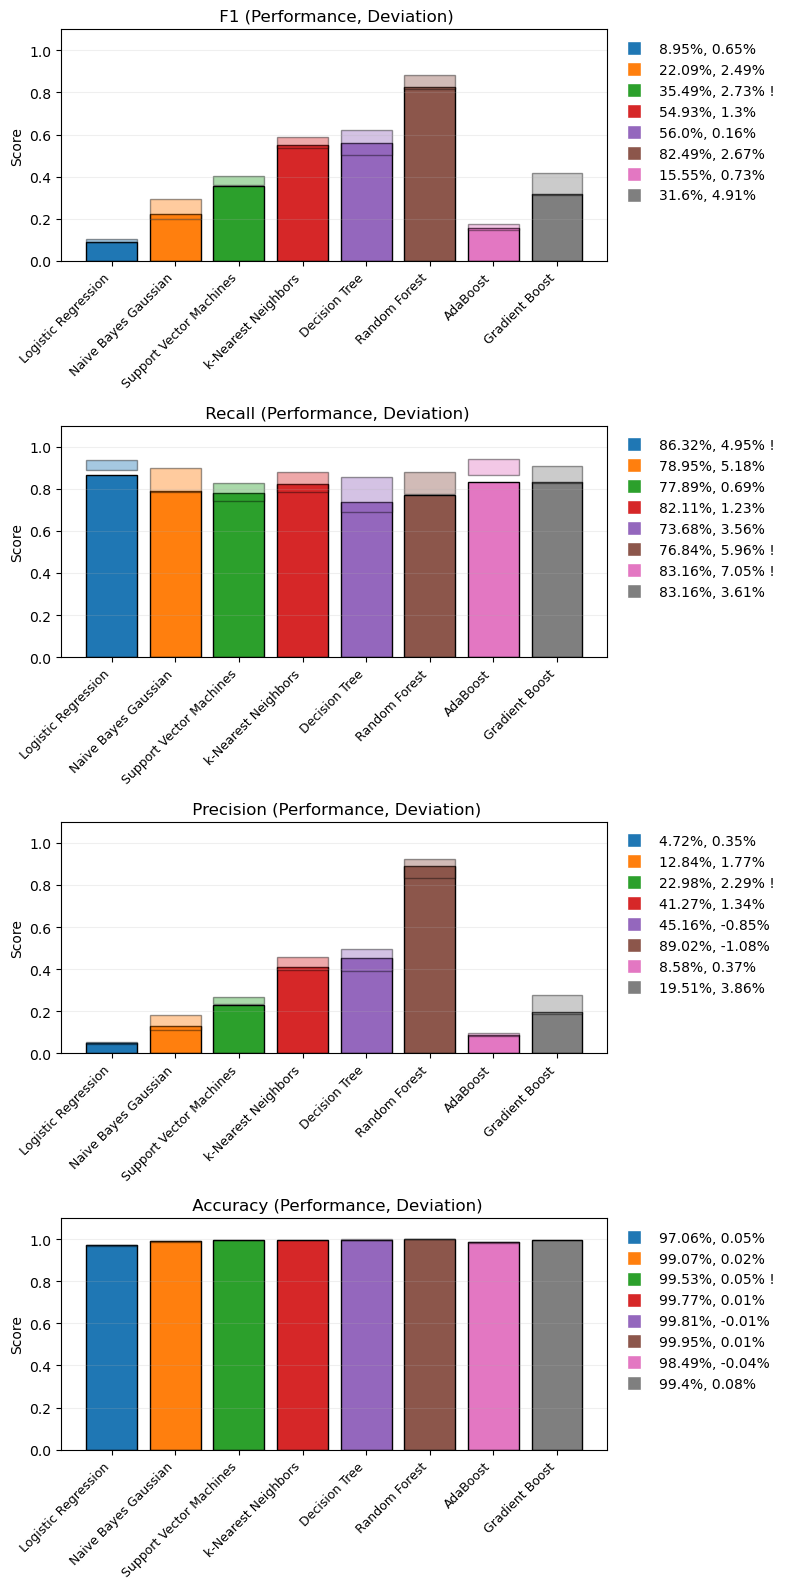

In [40]:
# Create the figure and subplots for each metric
fig, axes = plt.subplots(nrows=len(df_plot.columns), ncols=1, figsize=(8, 4*len(df_plot.columns)))
axes = np.array(axes).flatten()

for j, metric in enumerate(df_plot.columns):
  ax = axes[j]

  handles = []
  for i, model_name in enumerate(df_plot.index):

    # CV Scores
    cv_score_mean = cv_means.loc[model_name, metric]
    cv_score_std  = cv_stds.loc[model_name, metric]

    # Holdout Scores
    holdout_score = df_plot.loc[model_name, metric]

    # Barplot of Holdout Scores and STD of CV Scores
    ax.bar(i,  holdout_score, color=model_colors[model_name], edgecolor='black')
    ax.bar(i, 2*cv_score_std, color=model_colors[model_name], edgecolor='black',
           bottom=cv_score_mean-cv_score_std, alpha=0.4)

    deviation  = cv_score_mean - holdout_score
    is_out_dev = '' if abs(deviation) <= cv_score_std else '!'
    score      = (holdout_score*100).round(2)

    handles.append(plt.Line2D(
        [0], [0], marker='s', color='w', markersize=10,
        markerfacecolor=model_colors[model_name],
        label=f"{score}%, {(deviation*100).round(2)}% {is_out_dev}" #
    ))

  # Axis labeling
  ax.set_title(f"{metric.replace('_', ' ')[4:].title()} (Performance, Deviation)", fontsize=12)
  ax.set_ylabel("Score")
  ax.set_ylim(0, 1.1)
  ax.set_xticks(list(range(len(df_plot.index))))
  ax.set_xticklabels(df_plot.index, rotation=45, ha='right', fontsize=9)
  ax.grid(axis='y', alpha=0.2)

  ax.legend(handles=handles, bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

fig.tight_layout()
fig.show()

# VI. Conclusion and Recommendation

## A. Random Forest: The Robust Classifier for this dataset.

Random Forest remains consistent in performance, maintaing high recall and precision. This means that the model has ~82.8 ± 5.13% fraud detection with a ~87.95 ± 4.48% chance of correctly detecting fraud.

The other algorithms have good recall but bad precision. These algorithms do detect most of the Fraud (good recall), but will franticly raise false alarms (bad precision).

## B. Model Optimization

This notebook has not explored model optimization tuning due to hardware constraints. Model optimization can be done by wrapping each SMOTE pipeline w/ a search algorithm (a.k.a. a Nested CV pipeline) like Grid Search, Random Search, or Bayesian Search (recommended for large datasets). Optimization ensures that models will avoid underfitting due to unoptimized parameters, improving the classifier's generalized performance.